In [1]:
# Data processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import svm
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Tree Visualization
import matplotlib.pyplot as plt
import seaborn as sn

Dataset split: 1797 train rows 1797 test rows


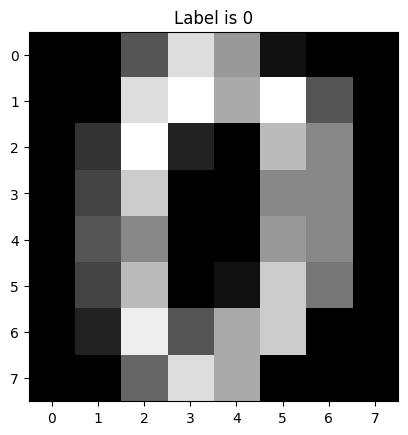

In [2]:
# Initialize
digits = load_digits()
print(f"Dataset split: {len(digits.data)} train rows",
          f"{len(digits.target)} test rows")

point = np.array(digits.images[0], dtype='uint8')
point = point.reshape((8, 8))

plt.title('Label is {label}'.format(label=digits.target[0]))
plt.imshow(point, cmap='gray')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, train_size=0.80, test_size=0.20, random_state=101)

In [3]:
# Add outliers
df = pd.DataFrame()
print(digits.data.shape)
print(digits.data)
print(digits.target)
print(digits.images)

(1797, 64)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0. 

In [4]:
# prepare Poly model and RBF model
poly_model = svm.SVC(kernel='poly', degree=10, C=1, coef0=1.5, decision_function_shape='ovo')
rbf_model = svm.SVC(kernel='rbf', gamma='scale', C=0.3)

poly_fit = poly_model.fit(X_train, y_train)
rbf_fit = rbf_model.fit(X_train, y_train)

tmp = rbf_model.decision_function(X_train)
print(tmp)

[[-0.27702239  8.27106005  5.0765596  ...  0.72467418  9.30615302
   3.84807461]
 [ 0.72130642  1.77606828  6.10418803 ...  9.30328419  8.2738603
   5.10670526]
 [ 2.7554986   3.77374264  4.82082073 ...  1.72878635  7.24470687
   9.30775421]
 ...
 [ 1.76062045  1.76010667  0.74129351 ...  1.75130908  7.27427475
   3.76614623]
 [-0.27937319  7.21038935  9.3049344  ...  4.82945787  8.25659059
   3.88350743]
 [ 8.22427232  6.23017052  3.75111414 ...  1.74975758  4.91539294
   2.77124996]]


In [5]:
# predict
poly_predict = poly_model.predict(X_test)
rbf_predict = rbf_model.predict(X_test)

In [6]:
# accuracy Polynomial Kernel
poly_accuracy = accuracy_score(y_test, poly_predict)
poly_f1 = f1_score(y_test, poly_predict, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy * 100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1 * 100))

Accuracy (Polynomial Kernel):  98.89
F1 (Polynomial Kernel):  98.89


In [7]:
# accuracy RBF Kernel
rbf_accuracy = accuracy_score(y_test, rbf_predict)
rbf_f1 = f1_score(y_test, rbf_predict, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy * 100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1 * 100))


Accuracy (RBF Kernel):  98.06
F1 (RBF Kernel):  98.06


In [8]:
# preparing Confusion Matrix and DataFrame Polynomial Kernel
cm = confusion_matrix(y_test, poly_predict)

poly_df = pd.DataFrame(cm, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

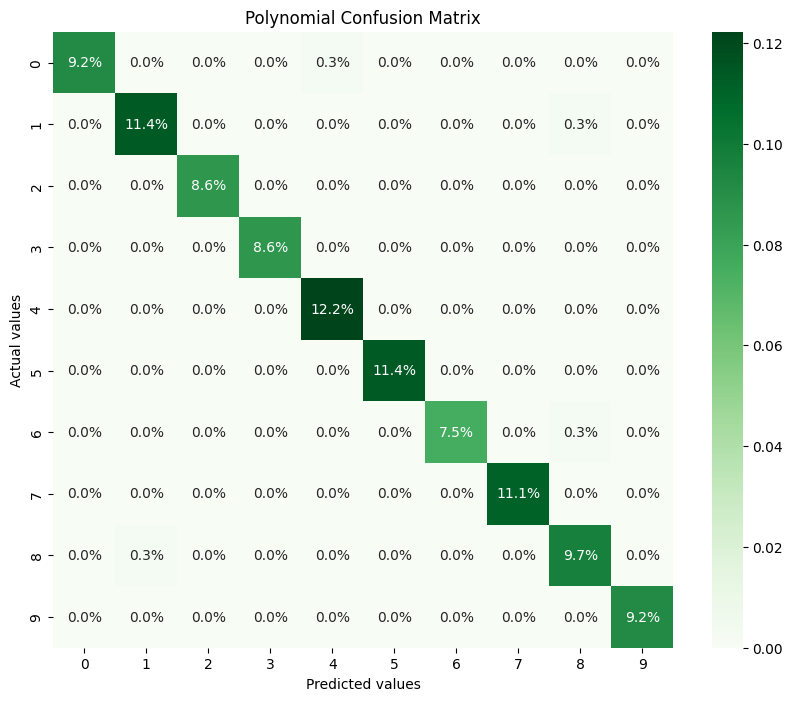

In [9]:
# plotting Confusion matrix RBF Kernel
plt.figure(figsize=(10,8))
sn.heatmap(poly_df/np.sum(cm), annot=True, fmt='.1%', cmap='Greens')
plt.title('Polynomial Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()

In [10]:
# preparing Confusion Matrix and DataFrame RBF Kernel
cm = confusion_matrix(y_test, rbf_predict)

rbf_df = pd.DataFrame(cm, index=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

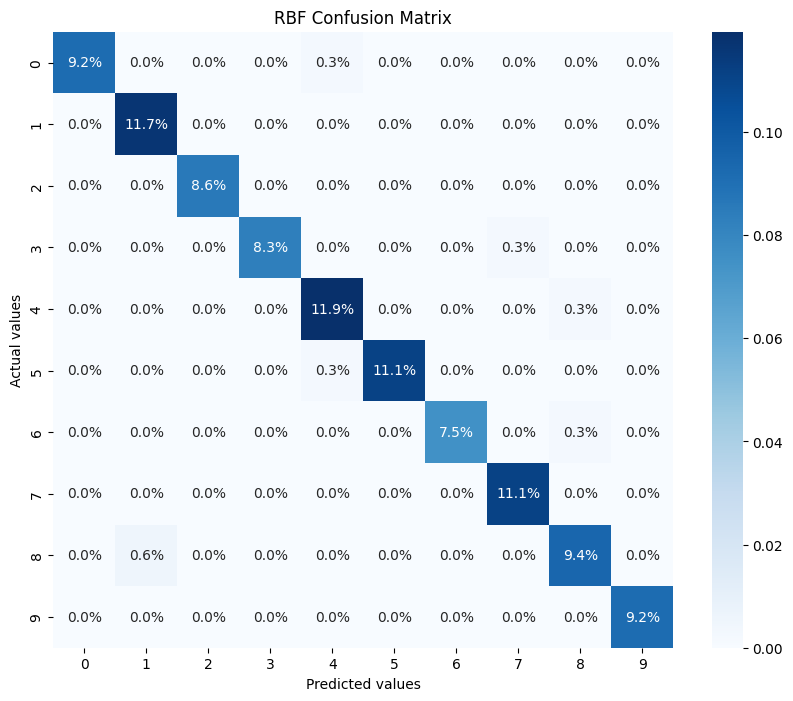

In [11]:
# plotting Confusion matrix RBF Kernel
plt.figure(figsize=(10,8))
sn.heatmap(rbf_df/np.sum(cm), annot=True, fmt='.1%', cmap='Blues')
plt.title('RBF Confusion Matrix')
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()